2-11-24

I am going to be running some tests to try to see if I get better regression results comparing EDUC to cognitive decline functions. 

1. Removing outliers. Going to do a search of EDUC and identify serious outliers. 

2. Repeating testing on some of the adjacent cognitive variables. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file = 'var_group1.csv'
df = pd.read_csv(file)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['EDUC'])
plt.title('Boxplot of Years of Education')
plt.show()


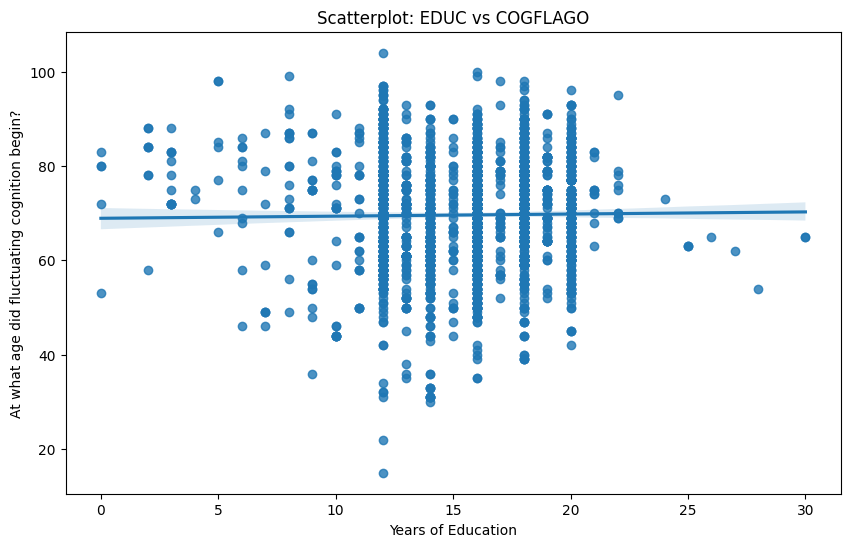

In [7]:

# Define outlier values
educUnknown = 99
cogflagoUnknown = (-4, 888, 999)

# Load the CSV file into a DataFrame
file = 'var_group1.csv'
df = pd.read_csv(file)

# Remove rows with outliers
df_clean = df[(df['EDUC'] != educUnknown) & (~df['COGFLAGO'].isin(cogflagoUnknown))]

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='EDUC', y='COGFLAGO', data=df_clean)
plt.title('Scatterplot: EDUC vs COGFLAGO')
plt.xlabel('Years of Education')
plt.ylabel('At what age did fluctuating cognition begin?')
plt.show()

### Trying a Robust Regression and a logarithmic transformation


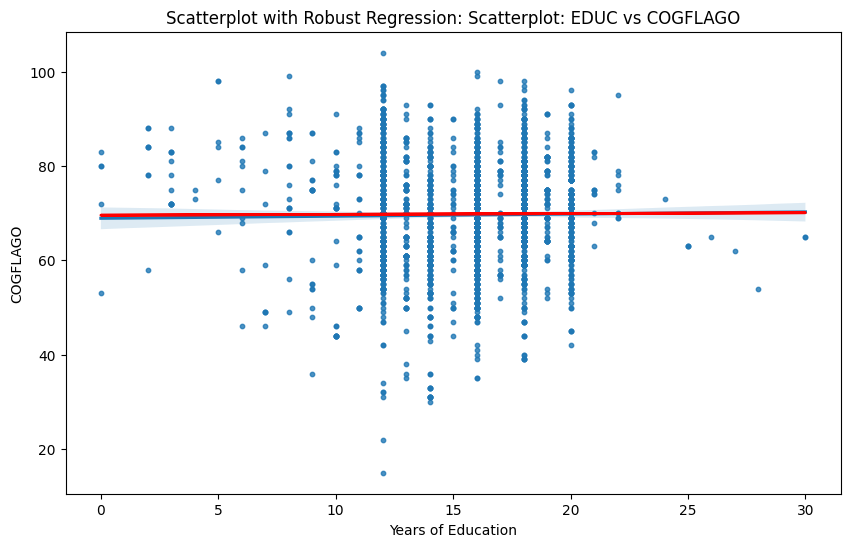

c:\Users\Andrew\Desktop\URDC\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_25128\2166759730.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EDUC_log'] = np.log(df_clean['EDUC'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_25128\2166759730.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['COGFLAGO_log'] = np.log(df_clean['COGFL

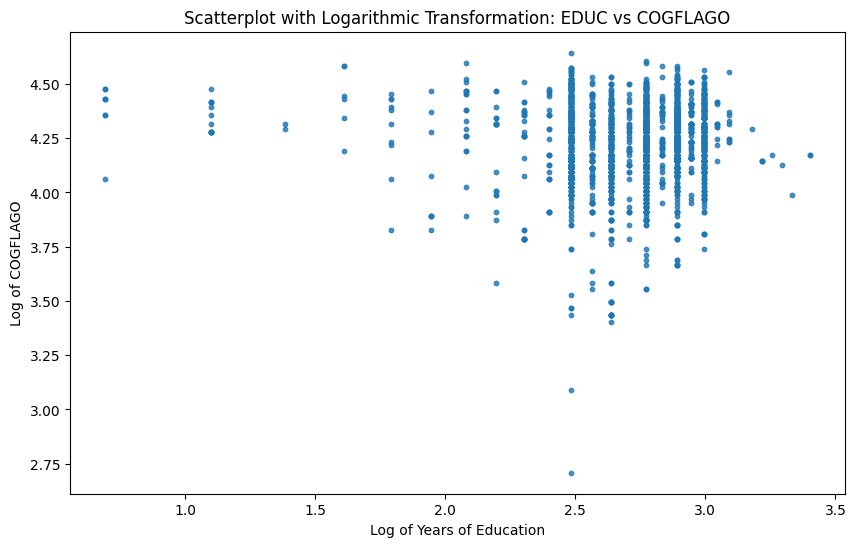

In [11]:
import numpy as np
from sklearn.linear_model import HuberRegressor
# Define outlier values
educUnknown = 99
cogflagoUnknown = (-4, 888, 999)

# Load the CSV file into a DataFrame
file = 'var_group1.csv'
df = pd.read_csv(file)

# Remove rows with outliers
df_clean = df[(df['EDUC'] != educUnknown) & (~df['COGFLAGO'].isin(cogflagoUnknown))]

huber = HuberRegressor()
huber.fit(df_clean[['EDUC']], df_clean['COGFLAGO'])
# Plot the scatterplot with the robust regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='EDUC', y='COGFLAGO', data=df_clean, scatter_kws={'s': 10})
plt.plot(df_clean['EDUC'], huber.predict(df_clean[['EDUC']]), color='red', linewidth=2)
plt.title('Scatterplot with Robust Regression: Scatterplot: EDUC vs COGFLAGO')
plt.xlabel('Years of Education')
plt.ylabel('COGFLAGO')
plt.show()

# Logarithmic transformation
df_clean['EDUC_log'] = np.log(df_clean['EDUC'])
df_clean['COGFLAGO_log'] = np.log(df_clean['COGFLAGO'])
df['EDUC_log'] = np.log1p(df['EDUC'])
df['COGMEM_log'] = np.log1p(df['COGMEM'])
plt.figure(figsize=(10, 6))
sns.regplot(x='EDUC_log', y='COGFLAGO_log', data=df_clean, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatterplot with Logarithmic Transformation: EDUC vs COGFLAGO')
plt.xlabel('Log of Years of Education')
plt.ylabel('Log of COGFLAGO')
plt.show()

# Pruning the Dataset for Heatmap validation

## Cleaning Tasks
-  Removing No information
- Normalizing categorical data
-  Longitudinal groupings




In [ ]:
file_path = 'venv/var_group1.csv'
df = pd.read_csv(file_path)


unknownResponses = [-4, 9]
selected_columns = ['DECIN', 'COGMEM', 'COGORI', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGFLUC', 'POSSADIF', 'POSSAD','PROBADIF', 'PROBAD','COGOTHR']

# EDUC variable, remove 99

# Save the subset DataFrame to a new CSV file
output_file_path = 'var_group1.csv'
df.to_csv(output_file_path, index=False)
# These variables represent the responses which correspond to N/A or unknown
